In [1]:
# NUERAL NETWORK REGRESSION WITH TENSORFLOW 
# PREDICT SELLING PRICE OF A HOUSE GIVEN INFORMATION ABOUT THEM 
# PREDICT THE COORDINATES OF A BOUNDING BOX OF AN ITEM IN AN IMAGE 
# PREDICT THE COST OF MEDICAL INSURANCE FOR AN INDIVIDUAL GIVEN THEIR DEMOGRAPHICS 

In [2]:
# ARCHITECTURE OF REGRESSION MODEL IN TENSORFLOW 
# GOING TO USE INPUT SHAPES AND OUTPUT SHAPES 
# INPUT SHAPES AND OUTPUT SHAPES 
# X -> FEATURES(DATA INPUTS) 
# Y -> LABELS(OUTPUTS)
# CREATING CUSTOM DATA TO VIEW AND FIT 
# STEPS IN MODELLING 
# 1. CREATING A MODEL 
# 2. COMPILING A MODEL 
#    -> DEFINING A LOSS FUNCTION 
#    -> SETTING UP AN OPTIMIZER 
#    -> CREATING EVALUATION METRICS 
# 3. FITTING A MODEL(GETTING IT TO FIND PATTERNS IN DATA) 
# 4. EVALUATE THE MODEL 
#    -> VISUALISE THE MODEL(VISUALISE VISUALISE VISUALISE) 
#    -> LOOKING AT TRAINING CURVES 
#    -> COMPARE PREDICTIONS TO GROUND TRUTH(USING EVALUATION METRICS) 
# 5. SAVING THE MODEL 
# 6. LOADING THE MODEL 

In [3]:
# TYPICAL ARCHITECTURE OF A REGRESSION NUERAL NETWORK 
# HYPERPARAMETERS 
# INPUT LAYER SHAPE -> SAME SHAPE AS A NUMBER OF FEATUES (EG. 3 FOR BEDROOM, N# OF CARS)
# HIDDEN LAYERS -> PROBLEM SPECIFIC, MINIMUM = 1, MAXIMUM = UNLIMITED 
# NUERONS PER HIDDEN LAYER -> PROBLEM SPECIFIC, GENERALLY 0 TO 100 
# OUTPUT LAYER SHAPE -> SAME SHAPE AS DESIRED PREDICTION SHAPE 
# HIDDEN ACTIVATION -> USUALLY RELU(RECIFIED LINEAR UNIT) 
# OUTPUT ACTIVATION -> NONE, RELU, LOGISTIC/TANH 
# LOSS FUNCTION -> MSE(MEAN SQUARED ERROR) OR MAE(MEAN ABSOLUTE ERROR) 
# OPTIMIZER -> ADAM OR STOCHASTIC GRADIENT DESCENT 

In [5]:
# LETS BEGIN 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 


In [6]:
# CREATE FEATURES 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X 

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [7]:
# CREATE LABELS 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
y 

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

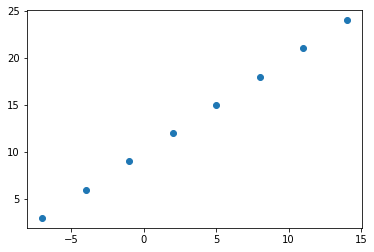

In [8]:
# VISUALISE IT 
plt.scatter(X, y)

In [9]:
# CALCULATE THE PATTERN BETWEEN X AND y 
# REGRESSION INPUT SHAPES AND OUTPUT SHAPES 
# INPUT SHAPE -> SHAPE DATA GOES INTO THE MODEL 
# OUTPUT SHAPE -> SHAPE DATA COMES OUT OF THE MODEL 
# NUERAL NETWORKS ACCEPT NUMBERS AND OUTPUT NUMBERS. THESE NUMBERS ARE REPRESENTED AS TENSORS OR ARRAYS 


In [10]:
# EXAMPLE INPUT AND OUTPUT SHAPES OF A REGRESSION MODEL 
houseinfo = tf.constant(["bedroom", "bathroom", "garage"])
houseprice = tf.constant([939700])
houseinfo, houseprice

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [11]:
houseinfo.shape 

TensorShape([3])

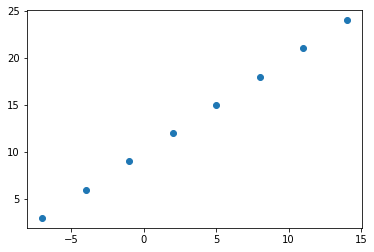

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [14]:
# GOAL is to ude X to predict y 
# so input will be X and output will be y 

In [16]:
# TAKE A SINGLE EXAMPLE OF X 
inputshape = X[0].shape 

# TAKE A SINGLE EXAMPLE OF Y 
outputshape = y[0].shape

inputshape, outputshape

(TensorShape([]), TensorShape([]))

In [17]:
# Take a look at it individually 
X[0], y[0] 

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [18]:
# FOR EXAMPLE => INPUT AND OUTPUT SHAPES 
# BEDROOMS, BATHROOM, GARAGE(0, 0, 0, 1) ETC = SHAPE IS 3 = INPUT 
# ML ALGORITHM => OUTPUT (PRICE OF THE HOUSE) SHAPE IS 1 

In [19]:
# STEPS IN MODELLING WITH TENSORFLOW 
# CREATING A MODEL => NUERAL NETWORK USING FUNCTIONAL OR SEQUENTIAL API OR IMPORT A PREVIOUSLY BUILT MODEL CALLED TRANSFER LEARNING 
# COMPILE THE MODEL => DEFINE HOW A MODELS PERFORMANCE SHOULD BE MEASURED(LOSS/METRICS) AS WELL AS HOW IT SHOULD IMRPOVE 
# FITTING THE MODEL => LETTING THE MODEL TRY AND FIND PATTERNS IN THE DATA 

In [20]:
tf.random.set_seed(42) 

# CREATE A MODEL USING THE SEQUENTIAL API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) 
])

In [22]:
# COMPILE THE MODEL 
model.compile(
    loss = tf.keras.losses.mae, # mean absolute error 
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent 
    metrics=['mae']
)

In [23]:
# FIT THE MODEL 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 107ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748


2022-05-03 12:07:34.342254: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [24]:
# MODEL JUST GOT TRAINED TO FIND PATTERNS BETWEEN X AND Y 
X, y 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [26]:
# MODEL DIDNT DO VERY WELL ? NEXT STOP IS TO IMPROVE THE MODEL 
# MODEL SHOULD OUTPUT SOMETHING CLOSE TO 27.0 

In [27]:
# IMPROVE THE MODEL 
# 3 STEPS 
# CREATE THE MODEL - ADD MORE LAYERS, INCREASE THE NUMBER OF HIDDEN UNITS(NUERONS) WITH EACH LAYER, 
# CHANGE THE ACTIVATION FUNCTIONS OF EACH LAYER 
# COMPILE THE MODEL - CHOOSE OPTMIZATION FUNCTIONS OR CHANGE THE LEARNING RATE OF THE OPTIMIZATION FUNCTION 
# FIT THE MODEL - EPOCHS(LEAVE THE MODEL TO TRAIN LONGER) OR MORE DATA TO LEARN FROM 

# OTHER COMMON WAYS TO IMPROVE THE MODEL 
# 1. LAYERS , NUMBER OF HIDDEN UNITS, ACTIVATION FUNCTIONS, OPTIMIZATION FUNCTIONS, LEARNING RATE, MORE DATA, FITTING LONGER

In [28]:
# SET A RANDOM SEED 
tf.random.set_seed(42) 

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile the model 
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"]) 

In [29]:
# fit the model with the data available for learning 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 97ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 1ms

In [30]:
# LOSS AND MAE HAS DECREASED 
X, y 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [31]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [32]:
# MODEL IS MUCH BETTER !!!

In [33]:
# EVALUATE THE MODEL 
# BUILD A MODEL -> EVALUATE THE MODEL -> TWEAK THE MODEL -> EVALUATE IT -> AND ON 

In [34]:
# MAKE SURE TO VISUALISE, VISUALISE, VISUALISE 
# THE DATA - WHAT DATA ARE YOU WORKING WITH? WHAT DOES IT LOOK LIKE ? 
# THE MODEL ITSELF -> WHAT DOES THE ARCHITECTURE LOOK LIKE ? WHAT ARE THE DIFFERENT SHAPES 
# THE TRAINING OF THE MODEL -> HOW DOES THE MODEL PERFORM WHILST IT LEARNS 
# PREDICTIONS OF THE MODEL -> HOW DO THE PREDICTIONS OF A MODEL LINE UP AGAINST GROUND TRUTH 

In [45]:
# MAKE A BIGGER DATASET 
X = np.arange(-100, 100, 4) 
X 

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [46]:
# MAKE LABELS FOR THE DATASET (ADHERING TO THE SAME PATTERN AS BEFORE)
y = np.arange(-90, 110, 4) 
y 

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [47]:
# SAME AS RESULT AS ABOVE 
y = X + 10 
y 

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [48]:
# SPLIT DATA INTO TRAINING AND TEST SET 
# EACH SET SERVES A SPECIFIC PURPOSE: 
# TRAINING TEST - THE MODEL LEARNS FROM THIS DATA, WHICH IS TYPICALLY 70% - 80% OF THE TOTAL DATA AVAILABLE 
# VALIDATION SET - THE MODEL GETS TUNED ON THIS DATA WHICH IS TYPICALLY 10-15% OF THE TOTAL DATA AVAILABLE 
# TEST SET - THE MODEL GETS EVALUATED ON THIS DATA TO TEST WHAT IT HAS LEARNED, it's typically 10-15% of the total data available



In [49]:
# WE CAN CREATE SPLITTING OUR X AND Y ARRAYS 
len(X) 

50

In [57]:
#SPLIT DATA INTO TRAIN AND TEST SETS 
X_train = X[:40] 
X_train 


array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56])

In [59]:
y_train = y[:40]
y_train 

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])

In [60]:
X_test = X[40:] # last 10 examples (20% of data) 
X_test 

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [61]:
y_test = y[40:]
y_test 

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [62]:
len(X_train), len(X_test)

(40, 10)

In [ ]:
# VISUALISE THE DATA 